In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
disable_en = pd.read_csv("/Users/Yixiao/Desktop/611project/project_3/data/DISABILITY_ENTRY_191102.tsv", sep="\t")
disable_ex = pd.read_csv("/Users/Yixiao/Desktop/611project/project_3/data/DISABILITY_EXIT_191102.tsv", sep="\t")
health_ins_en = pd.read_csv("/Users/Yixiao/Desktop/611project/project_3/data/HEALTH_INS_ENTRY_191102.tsv", sep="\t")
health_ins_ex = pd.read_csv("/Users/Yixiao/Desktop/611project/project_3/data/HEALTH_INS_EXIT_191102.tsv", sep="\t")
income_en = pd.read_csv("/Users/Yixiao/Desktop/611project/project_3/data/INCOME_ENTRY_191102.tsv", sep="\t")
income_ex = pd.read_csv("/Users/Yixiao/Desktop/611project/project_3/data/INCOME_EXIT_191102.tsv", sep="\t")
noncash_en = pd.read_csv("/Users/Yixiao/Desktop/611project/project_3/data/NONCASH_ENTRY_191102.tsv", sep="\t")
noncash_ex = pd.read_csv("/Users/Yixiao/Desktop/611project/project_3/data/NONCASH_EXIT_191102.tsv", sep="\t")
en_ex = pd.read_csv("/Users/Yixiao/Desktop/611project/project_3/data/ENTRY_EXIT_191102.tsv", sep="\t")
client = pd.read_csv("/Users/Yixiao/Desktop/611project/project_3/data/CLIENT_191102.tsv", sep="\t")

In [210]:
df = client.merge(en_ex, on = "Client ID", how = "left")
print(df.columns)
df = df.iloc[:,[3,4,5,6,7,8,9,16,18,20]]
df

Index(['EE Provider ID_x', 'EE UID_x', 'Client Unique ID_x', 'Client ID',
       'Client Age at Entry', 'Client Age at Exit', 'Client Gender',
       'Client Primary Race', 'Client Ethnicity', 'Client Veteran Status',
       'EE Provider ID_y', 'EE UID_y', 'Client Unique ID_y',
       'Entry Exit Group Id', 'Entry Exit Household Id', 'Unnamed: 6',
       'Entry Date', 'Housing Move-in Date(5584)', 'Exit Date', 'Destination',
       'Reason for Leaving', 'Entry Exit Type', 'Entry Exit Date Added',
       'Entry Exit Date Updated'],
      dtype='object')


,Client ID,Client Age at Entry,Client Age at Exit,Client Gender,Client Primary Race,Client Ethnicity,Client Veteran Status,Entry Date,Exit Date,Reason for Leaving
0,397941,60.0,61.0,Female,White (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),8/15/2015,7/11/2016,Completed program
1,397941,60.0,61.0,Female,White (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),4/20/2015,4/26/2015,Other
2,397941,60.0,61.0,Female,White (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),5/4/2015,6/9/2015,Completed program
3,397941,60.0,61.0,Female,White (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),6/9/2015,8/14/2015,Other
4,130335,48.0,48.0,Female,Black or African American (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),8/15/2015,8/31/2015,Needs could not be met
5,130335,48.0,48.0,Female,Black or African American (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),10/30/2015,11/1/2015,Other
6,130335,48.0,48.0,Female,Black or African American (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),11/26/2015,12/3/2015,Other
7,130335,48.0,48.0,Female,Black or African American (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),12/5/2015,1/19/2016,Other
8,130335,48.0,48.0,Female,Black or African American (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),6/13/2015,7/10/2015,Other
9,130335,48.0,48.0,Female,Black or African American (HUD),Non-Hispanic/Non-Latino (HUD),No (HUD),7/10/2015,8/14/2015,Other


In [83]:
#how many unique clients are recorded in total
len(df["Client ID"].unique())

2364

In [211]:
#compute how long each client stay each time, add it as a new column "stay time"
def parse_ymd(s):
    mon_s, day_s, year_s = s.split("/")
    return datetime(int(year_s), int(mon_s), int(day_s))
stay_time = []
for i in range(len(df)):
    if pd.isnull(df["Entry Date"][i]) == False and pd.isnull(df["Exit Date"][i]) == False and df["Entry Date"][i] != df["Exit Date"][i]:
        stay_time.append(int(str(parse_ymd(df["Exit Date"][i]) - parse_ymd(df["Entry Date"][i])).split()[0]))
    else: 
        stay_time.append(0)
df["stay time"] = stay_time
print(df["stay time"].mean())

30.359221831119186


In [216]:
df
df.to_csv("/Users/Yixiao/Desktop/611project/project_3/data/processed_data.csv")

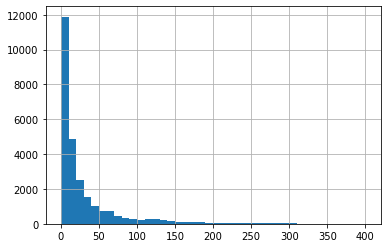

In [212]:
#how long each client stay
df["stay time"].hist(bins = 40, range= (0,400))

1369
1
11.176395939086294


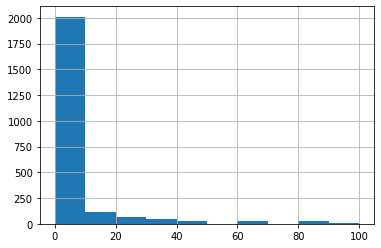

In [213]:
#how many times each client come
come_time = df.groupby("Client ID").size().sort_values()
print(come_time.max()) #max times one client come: 1369 times
print(come_time.min()) #min times one client come: only 1
print(come_time.mean()) #in average, one client come 11 times
come_time.hist(bins = 10,range = (0,100))

In [3]:
disable_en

,EE Provider ID,EE UID,Client Unique ID,Client ID,Disability Determination (Entry),Disability Type (Entry),Disability Start Date (Entry),Disability End Date (Entry),Provider (417-provider),Recordset ID (417-recordset_id),Date Added (417-date_added)
0,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,No (HUD),Alcohol Abuse (HUD),4/20/2015,NaN,Urban Ministries of Durham - Durham County(1562),2261529,7/16/2015
1,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,No (HUD),Both Alcohol and Drug Abuse (HUD),4/20/2015,NaN,Urban Ministries of Durham - Durham County(1562),2261530,7/16/2015
2,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,No (HUD),Chronic Health Condition (HUD),4/20/2015,NaN,Urban Ministries of Durham - Durham County(1562),2261524,7/16/2015
3,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,No (HUD),Developmental (HUD),4/20/2015,NaN,Urban Ministries of Durham - Durham County(1562),2261527,7/16/2015
4,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,No (HUD),Drug Abuse (HUD),4/20/2015,NaN,Urban Ministries of Durham - Durham County(1562),2261528,7/16/2015
5,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,No (HUD),HIV/AIDS (HUD),4/20/2015,NaN,Urban Ministries of Durham - Durham County(1562),2261526,7/16/2015
6,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,No (HUD),Physical (HUD),4/20/2015,NaN,Urban Ministries of Durham - Durham County(1562),2261525,7/16/2015
7,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,Yes (HUD),Mental Health Problem (HUD),4/20/2015,NaN,Urban Ministries of Durham - Durham County(1562),2261523,7/16/2015
8,Urban Ministries of Durham - Durham County - S...,687901,pbkf09291954p610b236,397941,Yes (HUD),Physical/Medical,4/20/2005,NaN,Urban Ministries of Durham - Durham County(1562),1959560,4/21/2015
9,Urban Ministries of Durham - Durham County - S...,687902,kdaf01071967k400d635,130335,No (HUD),Alcohol Abuse (HUD),6/13/2015,NaN,Urban Ministries of Durham - Durham County - S...,3235586,12/22/2015
